In [808]:
import pandas as pd

In [809]:
data=pd.read_csv("/content/heart (1).csv")

In [810]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [811]:
data.head

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1     37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2     41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3     56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4     57    0   0       120   354    0  ...      1      0.6      2   0     2       1
..   ...  ...  ..       ...   ...  ...  ...    ...      ...    ...  ..   ...     ...
298   57    0   0       140   241    0  ...      1      0.2      1   0     3       0
299   45    1   3       110   264    0  ...      0      1.2      1   0     3       0
300   68    1   0       144   193    1  ...      0      3.4      1   2     3       0
301   57    1   0       130   131    0  ...      1      1.2      1   1     3       0
302   57    0   1       130   236  

In [812]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


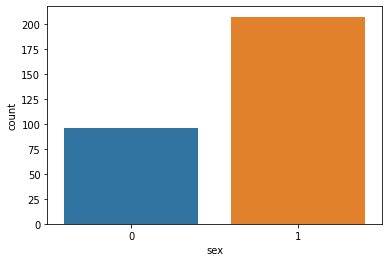

In [813]:
sns.countplot(data["sex"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


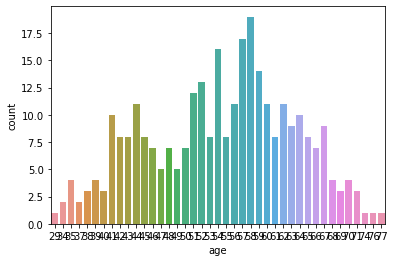

In [814]:
sns.countplot(data['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


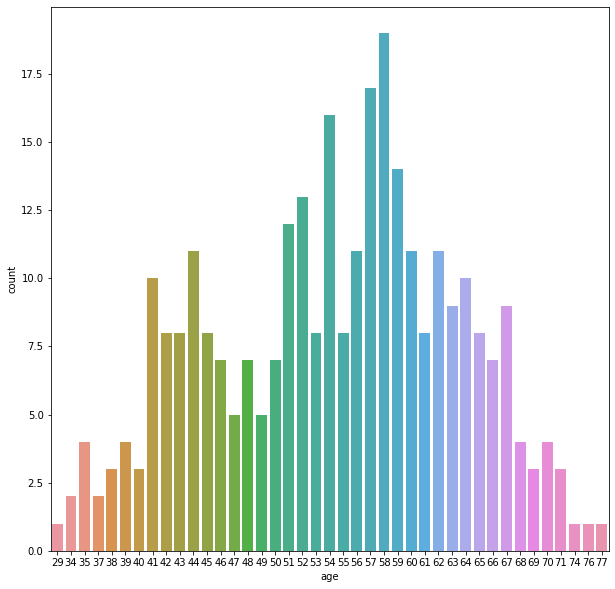

In [815]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.countplot(data['age'])

In [816]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [817]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [818]:
x=data.drop("target",axis='columns')

In [819]:
y=data.target

In [820]:
from sklearn.model_selection import train_test_split

In [821]:
train_data,test_data,train_label,test_label= train_test_split(x,y, test_size=0.2,stratify=y)

In [822]:
from sklearn import preprocessing
train_data=preprocessing.normalize(train_data)
test_data=preprocessing.normalize(test_data)

In [823]:
from tensorflow.keras import models

In [824]:
from tensorflow.keras import layers

In [825]:
model= models.Sequential()

In [826]:
model.add(layers.Dense(1228,activation="tanh",input_shape=(train_data.shape[1],)))
model.add(layers.Dense(128,activation='tanh'))
model.add(layers.Dense(28,activation='tanh'))
model.add(layers.Dense(1,activation='sigmoid'))

In [827]:
model.compile(optimizer='adam',loss='mse',metrics=['acc'])

In [828]:
model.fit(train_data,train_label,epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 0.2617 - acc: 0.4959
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2332 - acc: 0.6116
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2287 - acc: 0.6198
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2168 - acc: 0.6777
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2125 - acc: 0.6529
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2002 - acc: 0.6777
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1934 - acc: 0.6736
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1945 - acc: 0.6860
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2013 - acc: 0.6818
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2039 - acc: 0.6736
Epoch 11/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1908 

In [829]:
model.evaluate(test_data,test_label)

2/2 [==============================] - 0s 7ms/step - loss: 0.1400 - acc: 0.8197


[0.14001715183258057, 0.8196721076965332]